In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

import nltk
nltk.download('punkt_tab')
# NLP libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Set style for plots
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
nltk.download('punkt')
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\midoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\midoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\midoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\midoo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\midoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\midoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\

True

In [3]:
# 1. Load the data from CSV
def load_data(filepath):
    df = pd.read_csv(filepath)
    # Ensure we have the expected columns
    if not all(col in df.columns for col in ['clean_text', 'category']):
        raise ValueError("CSV file must contain 'clean_text' and 'category' columns")
    return df

# Replace this with your actual file path
file_path = "F:\Oasis Infobyte_internship\Sentiment Analysis\Twitter_Data.csv"  # Update this path
data = load_data(file_path)

# Map numerical categories to sentiment labels
sentiment_mapping = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
data['sentiment'] = data['category'].map(sentiment_mapping)

# Display basic info
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
display(data.head())

# Check class distribution
print("\nSentiment Distribution:")
print(data['sentiment'].value_counts())

<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
C:\Users\midoo\AppData\Local\Temp\ipykernel_14420\3515984552.py:10: SyntaxWarning: invalid escape sequence '\O'
  file_path = "F:\Oasis Infobyte_internship\Sentiment Analysis\Twitter_Data.csv"  # Update this path


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
 2   sentiment   162973 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.7+ MB
None

First 5 rows:


,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive



Sentiment Distribution:
sentiment
Positive    72250
Neutral     55213
Negative    35510
Name: count, dtype: int64


In [5]:


# 2. Text Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply cleaning function to text data
data['cleaned_text'] = data['clean_text'].apply(clean_text)

# Display cleaned text
print("\nOriginal vs Cleaned Text:")
data[['clean_text', 'cleaned_text']].head()


Original vs Cleaned Text:


,clean_text,cleaned_text
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,answer among powerful world leader today trump...


C:\Users\midoo\AppData\Local\Temp\ipykernel_14420\4152308896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


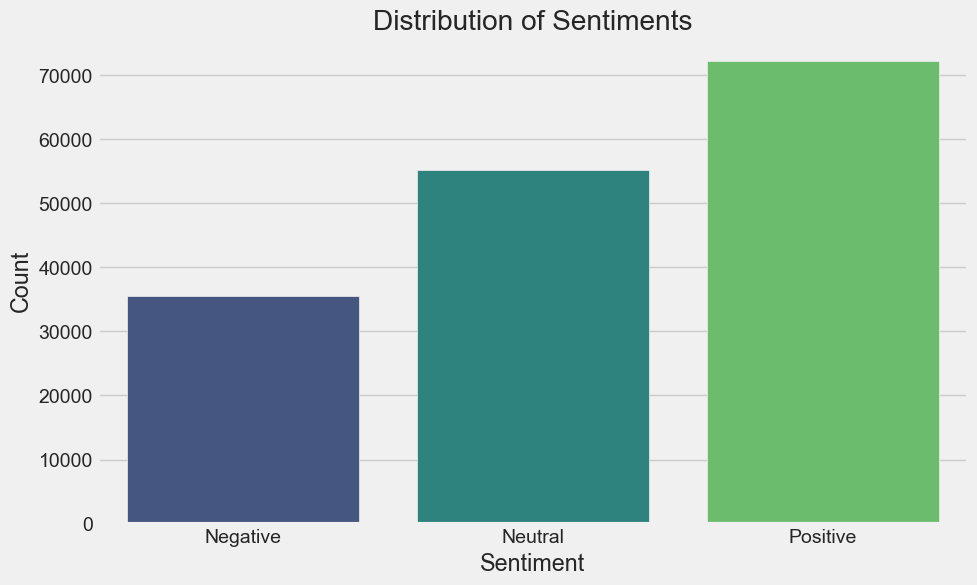

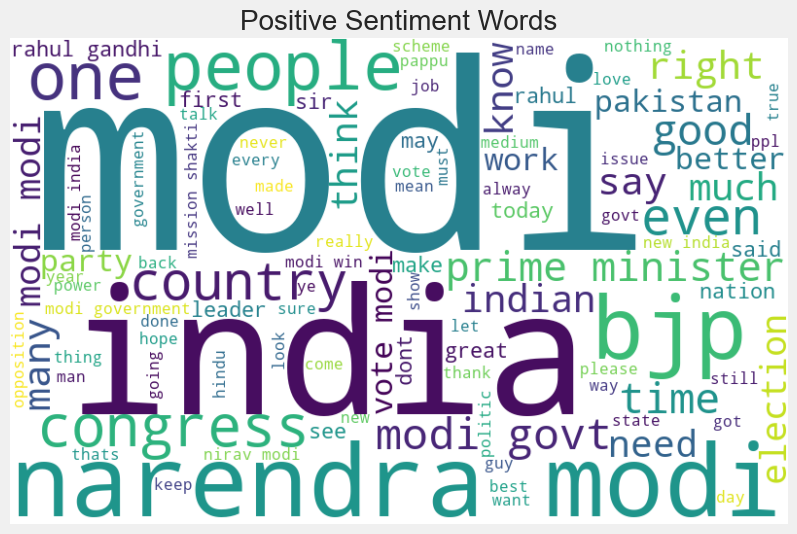

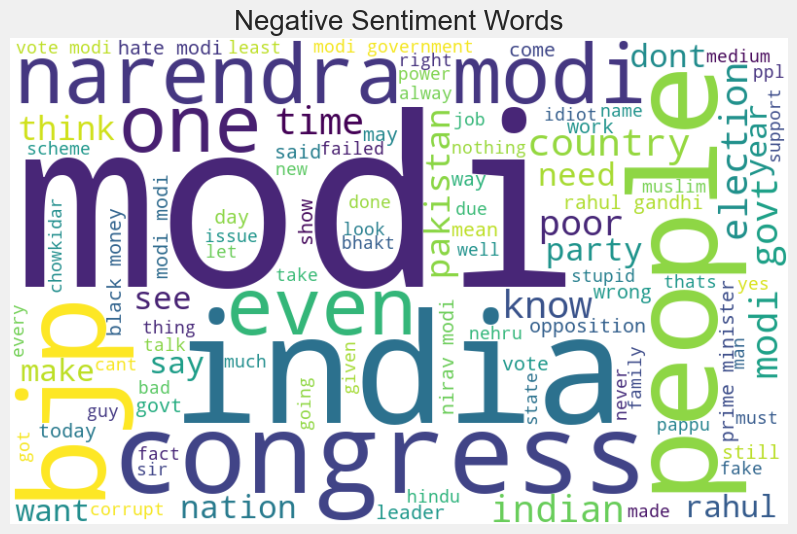

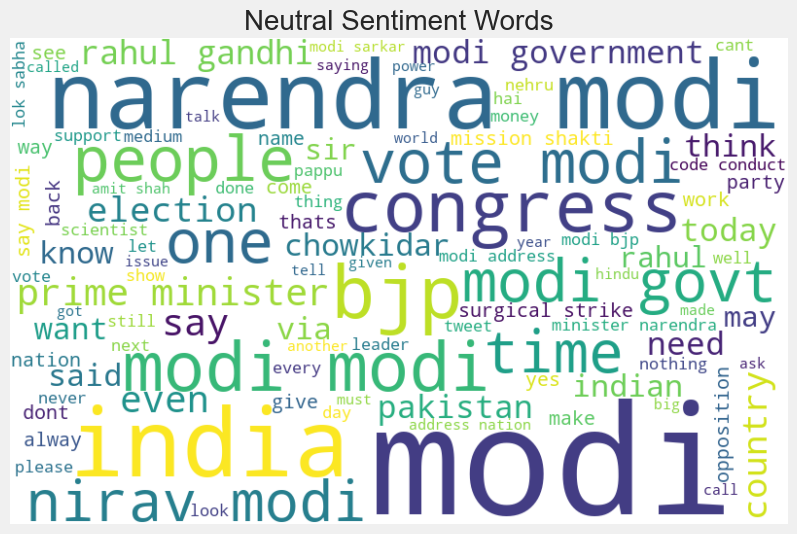

C:\Users\midoo\AppData\Local\Temp\ipykernel_14420\4152308896.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')


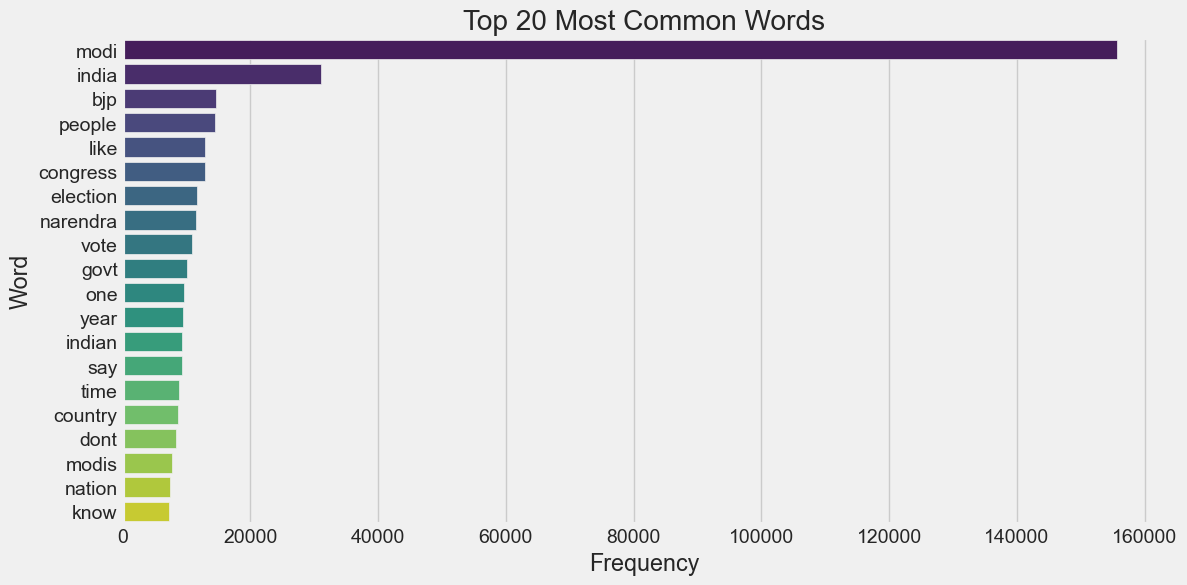

In [6]:
# 3. Exploratory Data Analysis (EDA)
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word clouds for each sentiment
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=500, 
                          background_color='white', 
                          max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Positive sentiment word cloud
positive_text = ' '.join(data[data['sentiment'] == 'Positive']['cleaned_text'])
generate_wordcloud(positive_text, 'Positive Sentiment Words')

# Negative sentiment word cloud
negative_text = ' '.join(data[data['sentiment'] == 'Negative']['cleaned_text'])
generate_wordcloud(negative_text, 'Negative Sentiment Words')

# Neutral sentiment word cloud
neutral_text = ' '.join(data[data['sentiment'] == 'Neutral']['cleaned_text'])
generate_wordcloud(neutral_text, 'Neutral Sentiment Words')

# Most common words
def get_most_common_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get and plot most common words
common_words = get_most_common_words(data['cleaned_text'])
words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.show()

In [9]:
# 4. Feature Engineering
# TF-IDF Vectorization
# Remove rows with NaN in the target variable
data = data.dropna(subset=['category'])

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(data['cleaned_text'])
y = data['category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 130378
Test samples: 32595



Naive Bayes Results:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.47      0.60      7102
     Neutral       0.79      0.69      0.74     11043
    Positive       0.68      0.89      0.77     14450

    accuracy                           0.73     32595
   macro avg       0.77      0.68      0.70     32595
weighted avg       0.75      0.73      0.72     32595



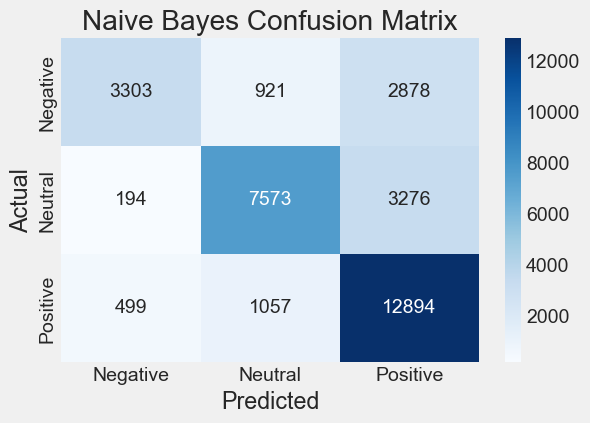


Logistic Regression Results:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.74      0.80      7102
     Neutral       0.84      0.96      0.89     11043
    Positive       0.91      0.87      0.89     14450

    accuracy                           0.87     32595
   macro avg       0.87      0.86      0.86     32595
weighted avg       0.87      0.87      0.87     32595



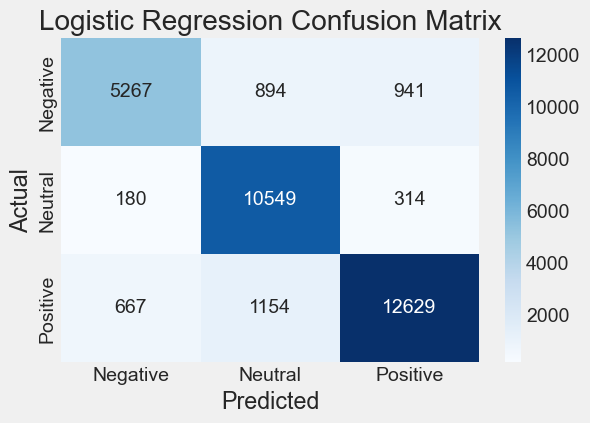

In [11]:
# 5. Model Training and Evaluation
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=sentiment_mapping.values())
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sentiment_mapping.values(), 
                yticklabels=sentiment_mapping.values())
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

C:\Users\midoo\AppData\Local\Temp\ipykernel_14420\3932011879.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=model_comparison, palette='viridis')


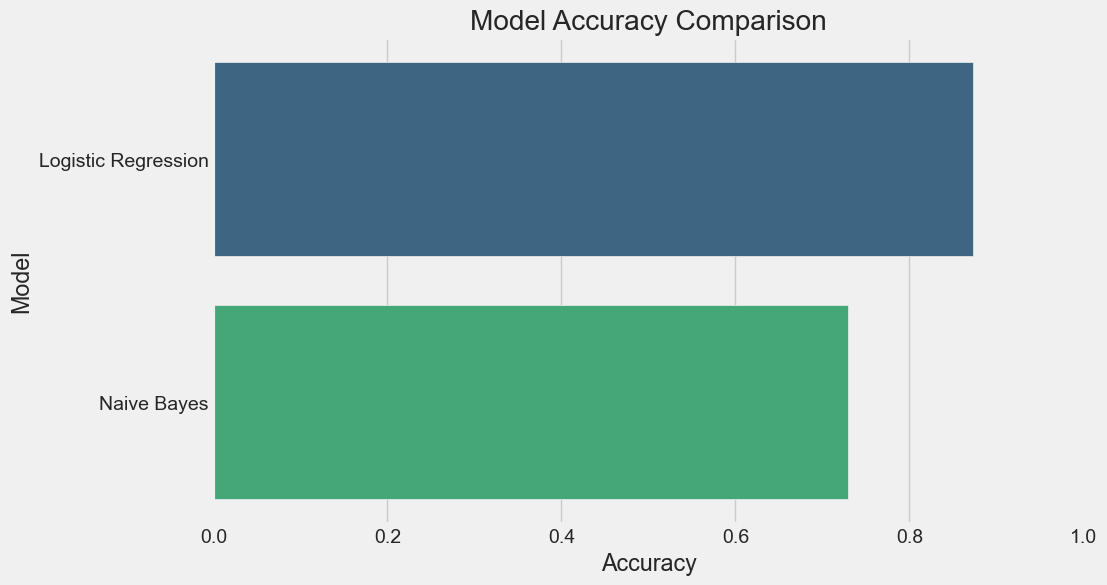


Best performing model: Logistic Regression

Sample Predictions:
Text: Modi is doing great work for the country
Sentiment: Positive

Text: I don't like the current government policies
Sentiment: Neutral

Text: The election results will be announced tomorrow
Sentiment: Neutral

Text: I love and hate him so much  but I think modi is world war criminal ,he killed so many kids   
Sentiment: Positive



In [25]:
# 6. Model Comparison and Selection
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [result['accuracy'] for result in results.values()]
}).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

# Select best model
best_model_name = model_comparison.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name}")

# 7. Making Predictions on New Text
def predict_sentiment(text, model, vectorizer):
    # Clean the text
    cleaned_text = clean_text(text)
    
    # Vectorize the text
    text_vector = vectorizer.transform([cleaned_text])
    
    # Make prediction
    prediction = model.predict(text_vector)[0]
    sentiment = sentiment_mapping[prediction]
    
    return sentiment

# Example predictions
sample_texts = [
    "Modi is doing great work for the country",
    "I don't like the current government policies",
    "The election results will be announced tomorrow"
]

print("\nSample Predictions:")
for text in sample_texts:
    sentiment = predict_sentiment(text, best_model, tfidf)
    print(f"Text: {text}\nSentiment: {sentiment}\n")